In [1]:
import pickle

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import im_utils

In [3]:
with open('../../Datasets/ADE20K_2021_17_01/index_ade20k.pkl', 'rb') as f:
    ade20k = pickle.load(f)

In [4]:
ade20k['description']

{'filename': 'array of length N=27574 with the image file names',
 'folder': 'array of length N with the image folder names.',
 'scene': 'array of length N providing the scene name (same classes as the Places database) for each image.',
 'objectIsPart': 'array of size [C, N] counting how many times an object is a part in each image. objectIsPart[c,i]=m if in image i object class c is a part of another object m times. For objects, objectIsPart[c,i]=0, and for parts we will find: objectIsPart[c,i] = objectPresence(c,i)',
 'objectPresence': 'array of size [C, N] with the object counts per image. objectPresence(c,i)=n if in image i there are n instances of object class c.',
 'objectcounts': 'array of length C with the number of instances for each object class.',
 'objectnames': 'array of length C with the object class names.',
 'proportionClassIsPart': 'array of length C with the proportion of times that class c behaves as a part. If proportionClassIsPart[c]=0 then it means that this is a 

In [5]:
len(ade20k['filename'])

27574

In [6]:
ade20k['folder'][0], ade20k['filename'][0], ade20k['scene'][0]


('ADE20K_2021_17_01/images/ADE/training/transportation/airport_terminal',
 'ADE_train_00000001.jpg',
 'airport_terminal')

In [11]:
def plot(p):
    img = Image.open(p)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.show()


In [22]:
len(ade20k['objectnames'])

3688

In [41]:
obj_freq = {n: c for n, c in zip(ade20k['objectnames'], ade20k['objectcounts'])}
obj_freq = sorted(obj_freq.items(), key=lambda x: x[1], reverse=True)

len(obj_freq)

3688

{0, 6, 774, 783, 2978, 1445, 1831, 1451, 1583, 303, 1981, 447, 64, 581, 2380, 976, 471, 90, 95, 97, 236, 3055, 1910}


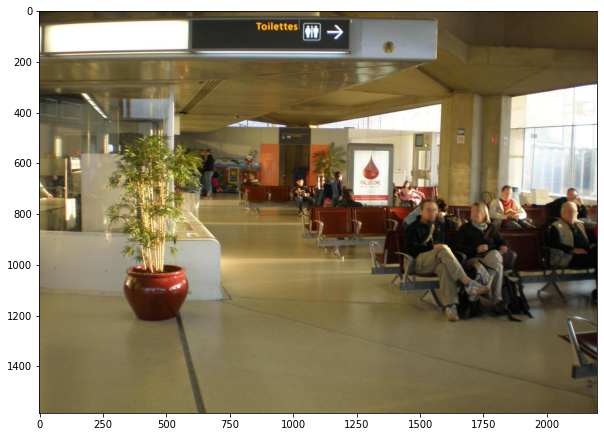

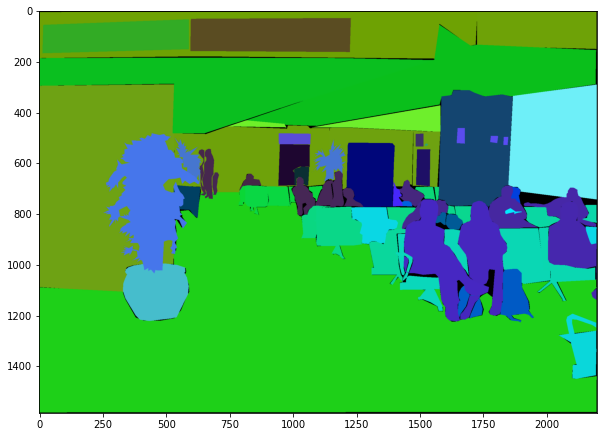

In [26]:
idx = 1
path = f"../../Datasets/{ade20k['folder'][idx]}/{ade20k['filename'][idx]}"

im = im_utils.loadAde20K(path)

print(set(im['class_mask'].flatten().tolist()))

plot(im['img_name'])
plot(im['segm_name'])

In [28]:
im['objects'].keys()

dict_keys(['instancendx', 'class', 'corrected_raw_name', 'iscrop', 'listattributes', 'polygon'])

In [34]:
im['objects']['instancendx'].__len__(), im['objects']['class'].__len__(), im['objects']['polygon'].__len__()


(75, 75, 75)

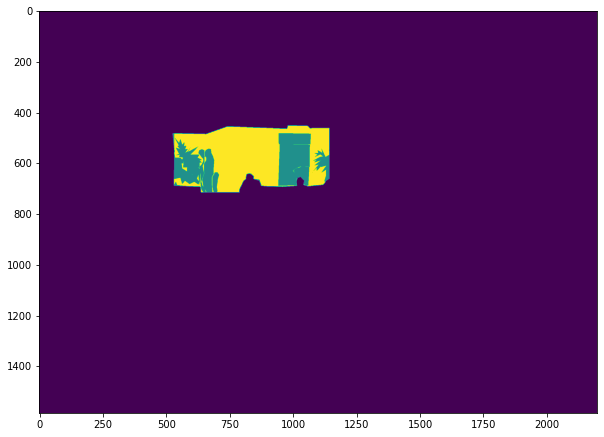

In [20]:
path_i = "../../Datasets/ADE20K_2021_17_01/images/ADE/training/transportation/airport_terminal/ADE_train_00000002/instance_008_ADE_train_00000002.png"

plot(path_i)

In [24]:
im_arr = np.array(Image.open(path_i))

set(im_arr.flatten().tolist())

{0, 128, 255}